<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
# Import torch
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)
# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

2.3.0+cu121
0.18.0+cu121
Using device: cpu


## 1. What are 3 areas in industry where computer vision is currently being used?

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
train_data = datasets.MNIST(
    root = "data",#where to download data to?
    train = True,#do you want to training dataset yes = True no = Flsae
    download = True,#want to download?
    transform = torchvision.transforms.ToTensor(),#how do you want to transform the data
    target_transform = None # how do we want to tranfrom the labels/targets?
)


In [4]:
test_data = datasets.MNIST(
    root = "data",#where to download data to?
    train = False,#do you want to training dataset yes = True no = Flsae
    download = True,#want to download?
    transform = ToTensor(),#how do you want to transform the data
    target_transform = None # how do we want to tranfrom the labels/targets?
)

In [5]:
len(train_data), len(test_data) # ชุดข้อมูลการฝึก (train_data) มีจำนวน 60,000 ตัวอย่างและชุดข้อมูลการทดสอบ (test_data) มีจำนวน 10,000 ตัวอย่าง

(60000, 10000)

In [6]:
image, label = train_data[0]#เข้าถึงชื่อคลาสทั้งหมดจาก train_data และเก็บไว้ในตัวแปร class_names

image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [7]:
class_name = train_data.classes #
class_name[:5],label

(['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four'], 5)

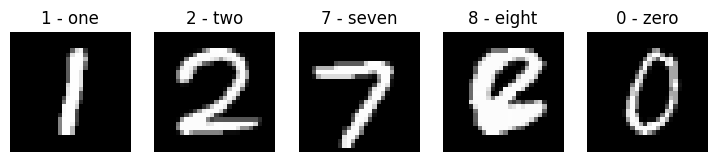

In [8]:
# Plot more images
# torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))# สร้าง figure object ของ matplotlib ขนาด 9x9 นิ้ว (ขนาดรูปภาพที่จะแสดง)
rows, cols = 1, 5#กำหนดจำนวนแถวและคอลัมน์ของ subplot ในกราฟเป็น 4x4
for i in range(1, rows*cols+1):#วนลูปเพื่อสร้าง subplot ทั้งหมด 16 ช่อง (เนื่องจาก rows*cols = 16)
  random_idx = torch.randint(0, len(train_data), size=[1]).item()# สุ่มเลือกอินเด็กซ์ของข้อมูลจากชุดฝึก train_data
  #โดยใช้ torch.randint โดยขนาดตัวอย่างเท่ากับ 1
  img, label = train_data[random_idx]#ดึงข้อมูลภาพและป้ายกำกับจาก train_data ที่ random_idx ที่เลือกมา
  fig.add_subplot(rows, cols, i)#เพิ่ม subplot ลงใน figure ที่ได้สร้างไว้ ในตำแหน่งที่ i (ที่กำหนดในลูป)
  plt.imshow(img.squeeze(), cmap="gray")#แสดงภาพ img โดยใช้ plt.imshow โดยการใช้ cmap="gray" เพื่อแสดงภาพในลักษณะขาวดำ (grayscale)
  plt.title(class_name[label])#กำหนดชื่อของ subplot จาก class_name ที่มี index เป็น label
  plt.axis(False);#ซ่อนแกนของ subplot เพื่อให้ภาพไม่มีกรอบและไม่มีตัวอ้างอิงตำแหน่งใดๆ

Image 1 shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image 1 label: 5 - five


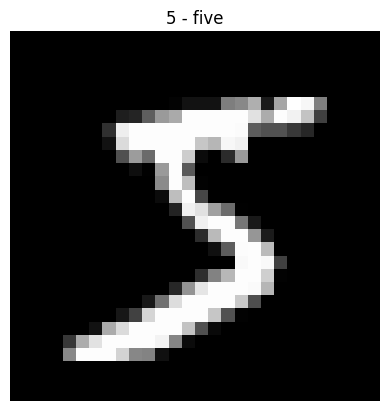

Image 2 shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image 2 label: 0 - zero


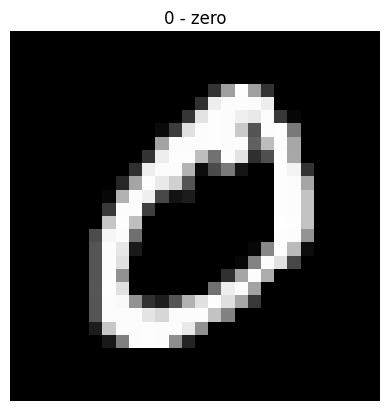

Image 3 shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image 3 label: 4 - four


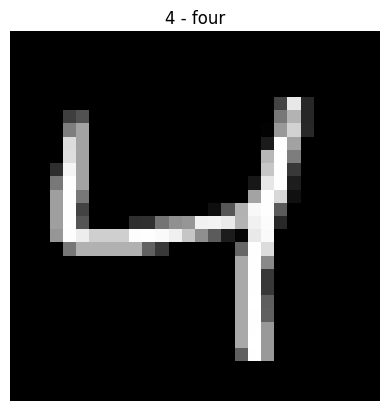

Image 4 shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image 4 label: 1 - one


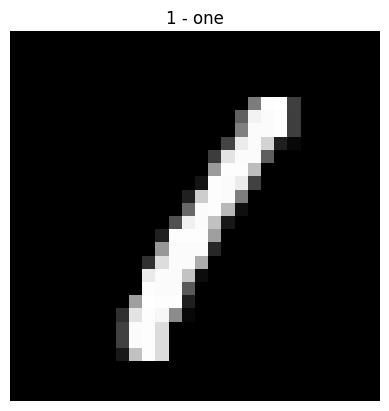

Image 5 shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image 5 label: 9 - nine


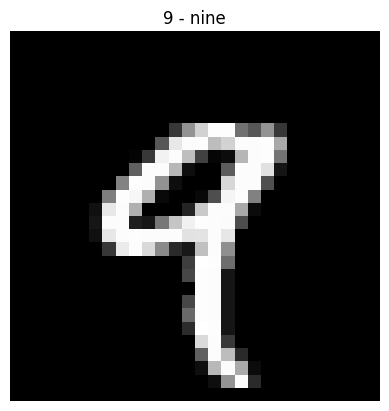

In [9]:
import matplotlib.pyplot as plt

# แสดง 5 ภาพที่แตกต่างกันจาก train_data
for i in range(5):
    image, label = train_data[i]  # ดึงข้อมูลภาพและป้ายชื่อจาก train_data ทีละภาพ
    print(f"Image {i+1} shape: {image.shape} -> [color_channels, height, width]")
    print(f"Image {i+1} label: {class_name[label]}")

    plt.figure()
    plt.title(class_name[label])  # ใช้ชื่อของคลาสในการตั้งชื่อรูปภาพ
    plt.imshow(image.squeeze(), cmap="gray")  # ลบมิติที่ไม่ต้องการออกและใช้ cmap="gray" เพื่อแสดงภาพขาวดำ
    plt.axis(False)  # ซ่อนแกนของกราฟ
    plt.show()  # แสดงภาพ


## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [10]:
from torch.utils.data import DataLoader
#set up batch size
BATCH_SIZE = 32
# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x78404e753850>,
 <torch.utils.data.dataloader.DataLoader at 0x78404e753ee0>)

In [11]:
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x78404e753850>, <torch.utils.data.dataloader.DataLoader object at 0x78404e753ee0>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [12]:
# Check out what's inside the training dataloader

# ใช้ next(iter(train_dataloader)) เพื่อดึง batch แรกออกมาจาก train_dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))

# พิมพ์รูปร่างของ train_features_batch และ train_labels_batch
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 1, label size: torch.Size([])


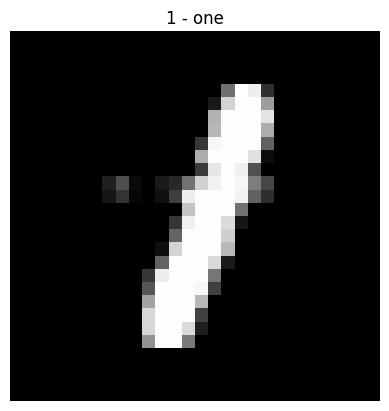

In [13]:
# Show a sample
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()

# เลือกภาพและป้ายกำกับจากชุดข้อมูล
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

# แสดงภาพโดยใช้ plt.imshow ในโหมด grayscale (cmap="gray")
plt.imshow(img.squeeze(), cmap="gray")

# กำหนดหัวเรื่องของภาพเป็นชื่อคลาสที่สอดคล้องกับป้ายกำกับ
plt.title(class_name[label])

# ซ่อนแกนของภาพเพื่อให้ไม่มีกรอบและไม่มีเลขลำดับตำแหน่ง
plt.axis(False)

# พิมพ์ขนาดของภาพ
print(f"Image size: {img.shape}")

# พิมพ์ป้ายกำกับและขนาดของป้ายกำกับ
print(f"Label: {label}, label size: {label.shape}")


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [14]:
#สร้างแบบจำลองCNNอิงจาก -> : https://poloclub.github.io/cnn-explainer/
class MNISTModelV2(nn.Module):
    """
    Model architecture that replicates the TinyVGG model from CNN explainer website.
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
      super().__init__()
      self.conv_block_1 = nn.Sequential(
          nn.Conv2d(in_channels=input_shape,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
          nn.ReLU(),
          nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2)
      )

      self.conv_block_2 = nn.Sequential(
          nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
          nn.ReLU(),
          nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2)
      )

      self.classifier = nn.Sequential(
          nn.Flatten(),
          nn.Linear(in_features=hidden_units*7*7,
                    out_features=output_shape)
      )
    def forward(self, X: torch.Tensor):
      X = self.conv_block_1(X)
      # print(f"Output shape of conv_block_1: {X.shape}")
      X = self.conv_block_2(X)
      # print(f"Output shape of conv_block_2: {X.shape}")
      X = self.classifier(X)
      # print(f"Output classifier : {X.shape}")
      return X

In [15]:
#Create a new instance
torch.manual_seed(42)
model_2 = MNISTModelV2(input_shape=1,
                               hidden_units=10,
                               output_shape=len(class_name)).to(device)
next(model_2.parameters()).device
model_2

MNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [16]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

In [17]:
dummy_x_model_2 = torch.rand([1, 1, 28, 28])
model_2(dummy_x_model_2)

tensor([[ 0.0372, -0.0748,  0.0573, -0.0396, -0.0098,  0.0194, -0.0003, -0.0114,
          0.0206,  0.0003]], grad_fn=<AddmmBackward0>)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [18]:
from urllib import request
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request.urlretrieve(url="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py",
                     filename="helper_functions.py")
  with open("helper_functions.py", "r") as f:
    print(f.read())

helper_functions.py already exists, skipping download...


In [19]:
#import accuracy metric
from helper_functions import accuracy_fn

#set up loss function
loss_fn = nn.CrossEntropyLoss()

#set up optimizer to optimize model's parameters
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [20]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [28]:
import torch
from tqdm.auto import tqdm
from timeit import default_timer as timer

# Import your model, loss function, optimizer, and accuracy function
# from your_module import model_2, loss_fn, optimizer, accuracy_fn, train_dataloader, test_dataloader, class_name, device

# Set the seed for reproducibility
torch.manual_seed(42)

# Track the start time for training
train_time_start_on_cpu = timer()

# Move the model to the specified device
model_0 = model_2.to(device)

# Set number of epochs
epochs = 5

# Create training and test loop
for epoch in tqdm(range(epochs), desc="Epochs"):
    print(f"Epoch: {epoch+1}\n-------")

    ### Training
    train_loss = 0
    model_0.train()

    # Loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        # Send data to the target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate the loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()  # Accumulate train loss

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()


    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)

    ### Testing
    test_loss, test_acc = 0, 0
    model_0.eval()

    with torch.inference_mode():
        for X, y in test_dataloader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model_0(X)

            # 2. Calculate the loss
            test_loss += loss_fn(test_pred, y).item()

            # 3. Calculate accuracy
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Calculate the test loss average per batch
        test_loss /= len(test_dataloader)
        # Calculate the test acc average per batch
        test_acc /= len(test_dataloader)

    # Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1
-------

Train loss: 0.03777 | Test loss: 0.04214, Test acc: 98.65%

Epoch: 2
-------

Train loss: 0.03651 | Test loss: 0.05451, Test acc: 98.33%

Epoch: 3
-------

Train loss: 0.03425 | Test loss: 0.04261, Test acc: 98.69%

Epoch: 4
-------

Train loss: 0.03357 | Test loss: 0.04132, Test acc: 98.60%

Epoch: 5
-------

Train loss: 0.03136 | Test loss: 0.03828, Test acc: 98.63%

Train time on cpu: 277.870 seconds


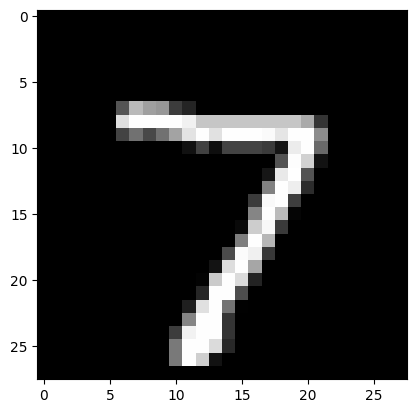

In [27]:
plt.imshow(test_data[0][0].squeeze(), cmap="gray")

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [29]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs=[]
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)
      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)
      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
      # Get pred_prob off the gpu for further calculations
      pred_probs.append(pred_prob.cpu())
  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [30]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_name[test_labels[0]])

NameError: name 'test_samples' is not defined

Text(0.5, 1.0, '2 - two')

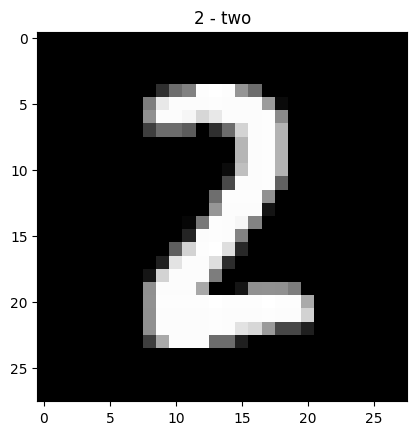

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?